In [1]:
import pandas as pd, matplotlib.pyplot as plt, matplotlib.style as style, seaborn as sns

### Importing, Understanding, and Inspecting Data:

In [2]:
df = pd.read_excel("data.xlsx")

In [3]:
df

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,561031,57759,76350,77.28,5,22289,51,3326,1981-11-10,Self employed,...,0,0,0,0,0,0,2yrs 4mon,2yrs 4mon,0,0
233150,649600,55009,71200,78.72,138,17408,51,3385,1992-10-15,Self employed,...,0,0,15209,0,0,0,1yrs 5mon,1yrs 5mon,1,0
233151,603445,58513,68000,88.24,135,23313,45,1797,1981-12-19,Self employed,...,0,0,257948,0,35,5,0yrs 9mon,3yrs 10mon,1,0
233152,442948,22824,40458,61.79,160,16212,48,96,1989-07-31,Self employed,...,0,0,26046,0,9,1,1yrs 2mon,3yrs 2mon,0,0


In [4]:
df.columns = df.columns.str.replace(" ", "_")

In [5]:
# check for missinf values

(df.isna().sum()/df.shape[0])*100  # percentage of missing values in each column 

UniqueID                               0.000000
disbursed_amount                       0.000000
asset_cost                             0.000000
ltv                                    0.000000
branch_id                              0.000000
supplier_id                            0.000000
manufacturer_id                        0.000000
Current_pincode_ID                     0.000000
Date.of.Birth                          0.000000
Employment.Type                        3.285811
DisbursalDate                          0.000000
State_ID                               0.000000
Employee_code_ID                       0.000000
MobileNo_Avl_Flag                      0.000000
Aadhar_flag                            0.000000
PAN_flag                               0.000000
VoterID_flag                           0.000000
Driving_flag                           0.000000
Passport_flag                          0.000000
PERFORM_CNS.SCORE                      0.000000
PERFORM_CNS.SCORE.DESCRIPTION          0

In [6]:
# drop na values 

df.dropna(inplace=True) # inplace = True - updates the current object to drop na values

In [7]:
# check for duplicated rows

df[df.duplicated()]  # no duplicate rows so no need to remove anything

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default


### Performing EDA and Modeling:

In [8]:
# show statistical description of numerical values

df.describe()  

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,225493.000000,225493.00000,2.254930e+05,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,225493.000000,...,225493.000000,2.254930e+05,2.254930e+05,2.254930e+05,2.254930e+05,2.254930e+05,225493.000000,225493.000000,225493.000000,225493.000000
mean,535677.453783,54240.72883,7.563113e+04,74.806634,73.070614,19645.597890,69.072251,3375.718133,7.241551,1550.665453,...,0.007362,5.569682e+03,7.489187e+03,7.371104e+03,1.299246e+04,3.256845e+02,0.386602,0.098708,0.208845,0.217155
std,68337.222749,12775.59006,1.852758e+04,11.441890,70.014147,3494.023799,22.164680,2253.216519,4.460856,975.664631,...,0.112301,1.729281e+05,1.860432e+05,1.854703e+05,1.497084e+05,1.575617e+04,0.959668,0.386376,0.710085,0.412310
min,417428.000000,13320.00000,3.700000e+04,13.500000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476481.000000,47049.00000,6.562500e+04,68.960000,14.000000,16555.000000,48.000000,1509.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535593.000000,53703.00000,7.080700e+04,76.890000,61.000000,20333.000000,86.000000,2949.000000,6.000000,1452.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,594774.000000,60213.00000,7.896600e+04,83.730000,130.000000,23004.000000,86.000000,5682.000000,10.000000,2365.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.045000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,987354.00000,1.328954e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [9]:
df.describe(include="O") # object description (include text objects)

,Employment.Type,PERFORM_CNS.SCORE.DESCRIPTION,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
count,225493,225493,225493,225493
unique,2,20,192,291
top,Self employed,No Bureau History Available,0yrs 0mon,0yrs 0mon
freq,127635,111773,114135,113894


In [10]:
df.loan_default.value_counts()  # target variable 

0    176526
1     48967
Name: loan_default, dtype: int64

In [11]:
df

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,561031,57759,76350,77.28,5,22289,51,3326,1981-11-10,Self employed,...,0,0,0,0,0,0,2yrs 4mon,2yrs 4mon,0,0
233150,649600,55009,71200,78.72,138,17408,51,3385,1992-10-15,Self employed,...,0,0,15209,0,0,0,1yrs 5mon,1yrs 5mon,1,0
233151,603445,58513,68000,88.24,135,23313,45,1797,1981-12-19,Self employed,...,0,0,257948,0,35,5,0yrs 9mon,3yrs 10mon,1,0
233152,442948,22824,40458,61.79,160,16212,48,96,1989-07-31,Self employed,...,0,0,26046,0,9,1,1yrs 2mon,3yrs 2mon,0,0


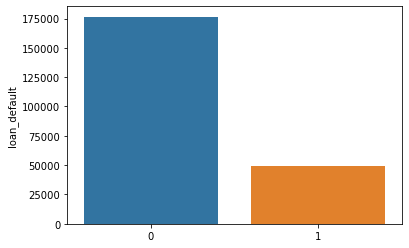

In [12]:
sns.barplot(x=df.loan_default.value_counts().index, y=df.loan_default.value_counts())
plt.show()

In [13]:
# Less loan defaults than those which do not have loan defaults

In [14]:
df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

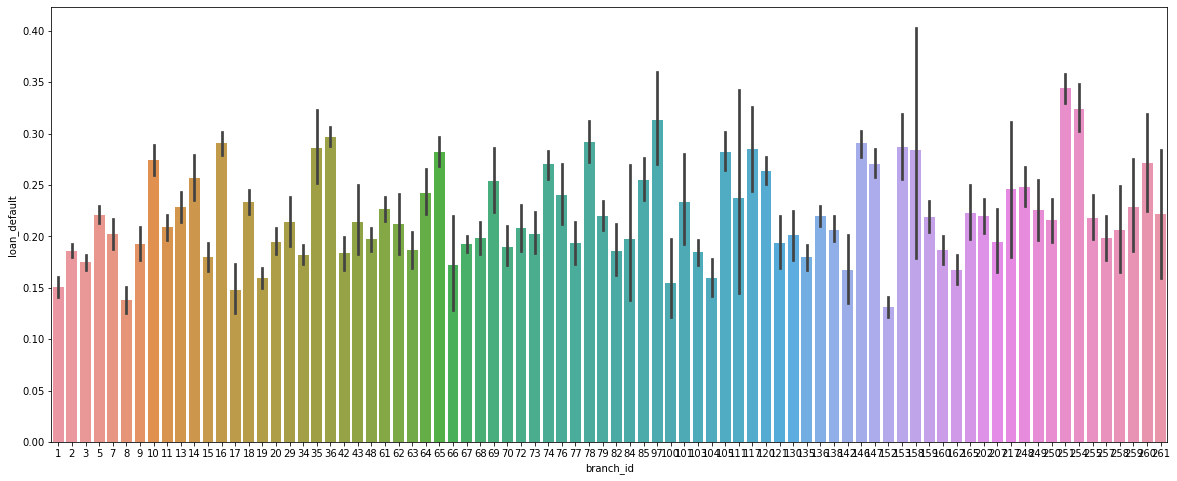

In [15]:
# show distribution of target variables with respect to other variables

plt.figure(figsize=(20,8))
sns.barplot(data=df, x="branch_id", y="loan_default")
plt.show()

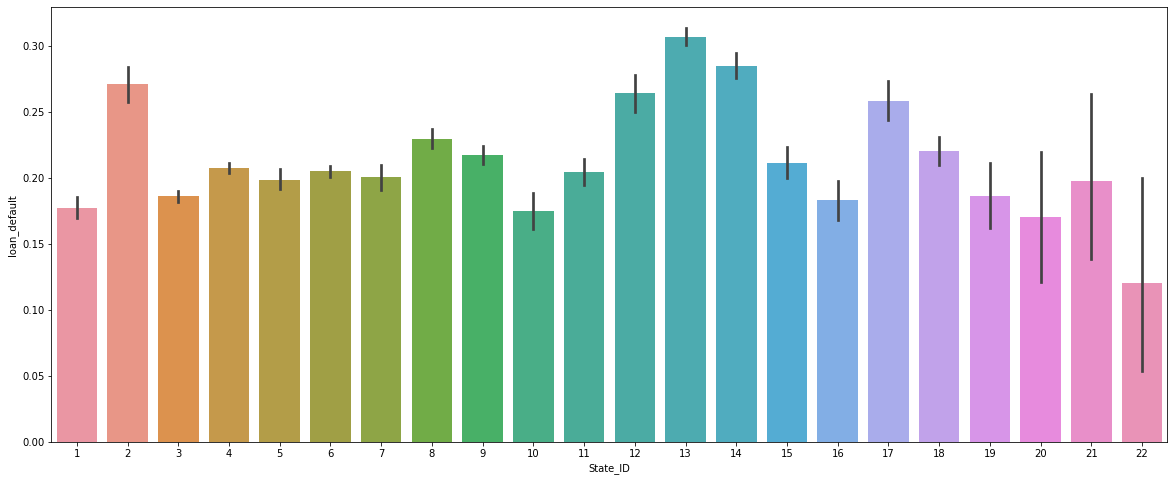

In [16]:
plt.figure(figsize=(20,8))
sns.barplot(data=df, x="State_ID", y="loan_default")
plt.show()

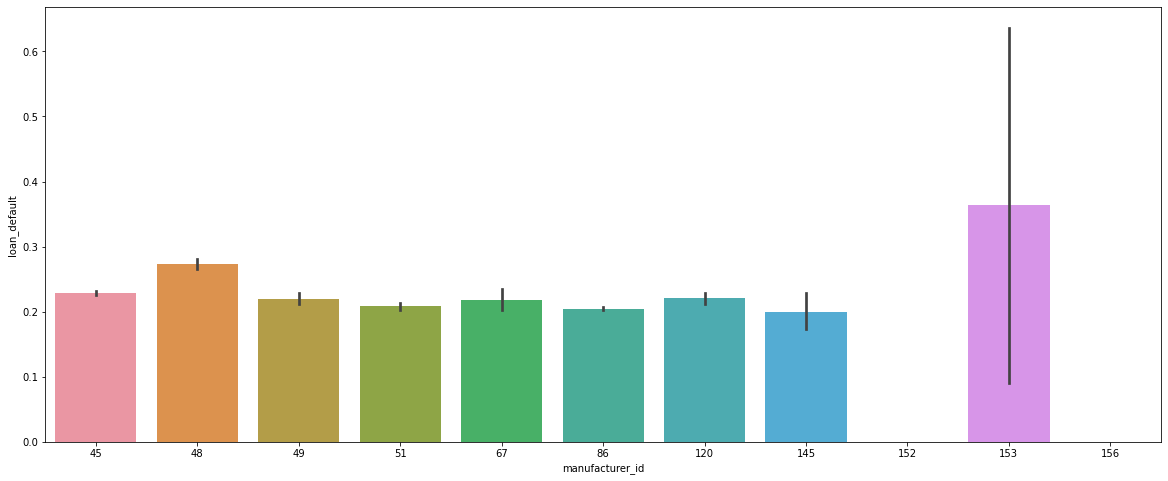

In [17]:
plt.figure(figsize=(20,8))
sns.barplot(data=df, x="manufacturer_id", y="loan_default")
plt.show()

In [18]:
df.manufacturer_id.value_counts()

86     106062
45      55207
51      26243
48      15721
49       9700
120      9417
67       2366
145       760
153        11
152         5
156         1
Name: manufacturer_id, dtype: int64

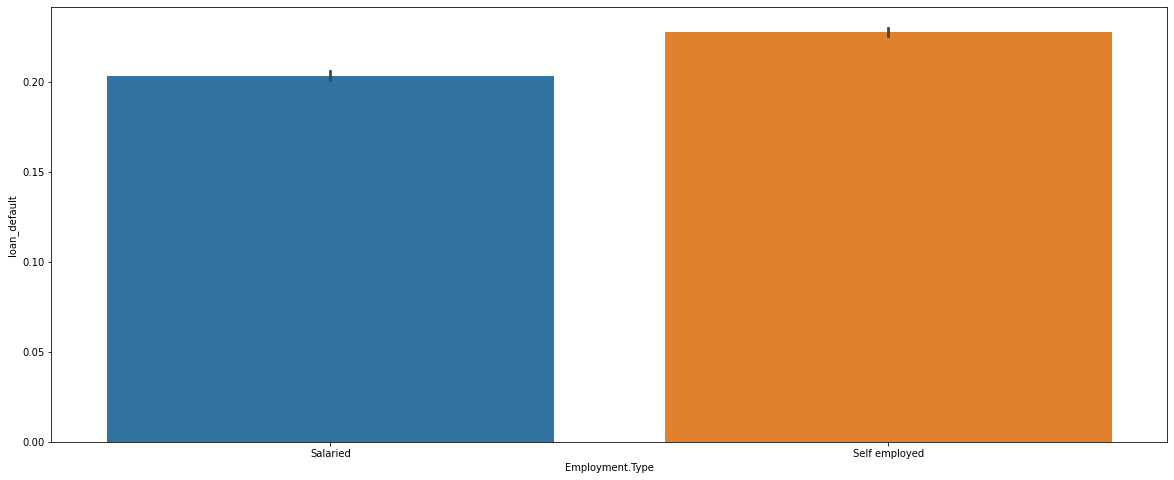

In [19]:
# employment type

plt.figure(figsize=(20,8))
sns.barplot(data=df, x="Employment.Type", y="loan_default")
plt.show()

In [20]:
# How does employment type influence loan default rates?

In [21]:
eType = pd.crosstab(df["Employment.Type"], df.loan_default)

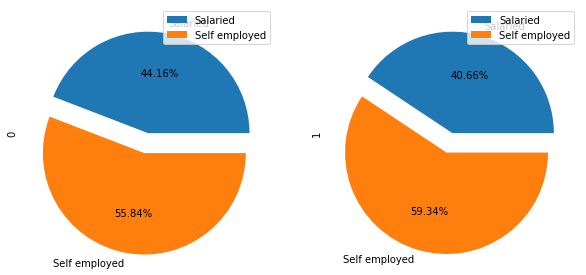

In [22]:
# Pie charts of those without and those with loan defaults by employment type.

eType.plot.pie(subplots=True, labels = eType.index, autopct="%.2f%%", explode=(0, 0.2), figsize=(10,10))
plt.show()

In [23]:
# How does account age affect loan defaults?

In [24]:
len(df.index)

225493

In [25]:
df["Calc_acct_age_months"] = ((((df["AVERAGE.ACCT.AGE"].str.extract("(\d+)yrs").astype(int))*12)) + ((df["AVERAGE.ACCT.AGE"].str.extract("(\d+)mon")).astype(int)))

In [26]:
df

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Calc_acct_age_months
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,0
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,Salaried,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,561031,57759,76350,77.28,5,22289,51,3326,1981-11-10,Self employed,...,0,0,0,0,0,2yrs 4mon,2yrs 4mon,0,0,28
233150,649600,55009,71200,78.72,138,17408,51,3385,1992-10-15,Self employed,...,0,15209,0,0,0,1yrs 5mon,1yrs 5mon,1,0,17
233151,603445,58513,68000,88.24,135,23313,45,1797,1981-12-19,Self employed,...,0,257948,0,35,5,0yrs 9mon,3yrs 10mon,1,0,9
233152,442948,22824,40458,61.79,160,16212,48,96,1989-07-31,Self employed,...,0,26046,0,9,1,1yrs 2mon,3yrs 2mon,0,0,14


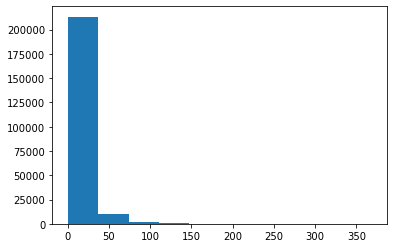

In [27]:
plt.hist(data=df, x='Calc_acct_age_months')  # majority of all accounts less than 50 months
plt.show()

<Figure size 1440x576 with 0 Axes>

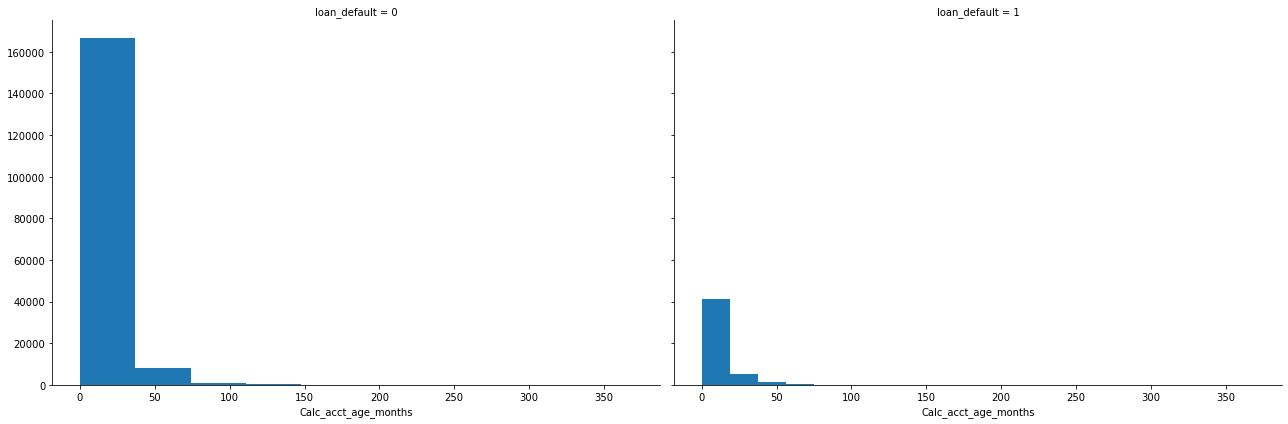

In [28]:
plt.figure(figsize=(20,8))
p=sns.FacetGrid(df, col="loan_default", height=6, aspect = 1.5)
p.map(plt.hist, "Calc_acct_age_months")    # histogram plot of account age in months
plt.show()

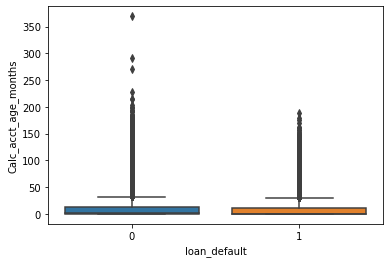

In [29]:
sns.boxplot(data=df, x='loan_default', y='Calc_acct_age_months')
plt.show()

In [30]:
# the majority of people with loan defaults tend to have had their accounts for
# a shorter amount of time

In [31]:
# Which column has the highest count from 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
#      'Driving_flag', 'Passport_flag'

In [32]:
df[['Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag']].sum()  # Aadhar_flag is the most expensive

Aadhar_flag      188900
PAN_flag          17450
VoterID_flag      33176
Driving_flag       5341
Passport_flag       482
dtype: int64

In [33]:
df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default', 'Calc_acct_age_months'],
      dtype='object')

In [34]:
df[['PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'loan_default']].describe()

,PERFORM_CNS.SCORE,loan_default
count,225493.000000,225493.000000
mean,293.040449,0.217155
std,338.874784,0.412310
min,0.000000,0.000000
25%,0.000000,0.000000
50%,15.000000,0.000000
75%,680.000000,0.000000
max,890.000000,1.000000


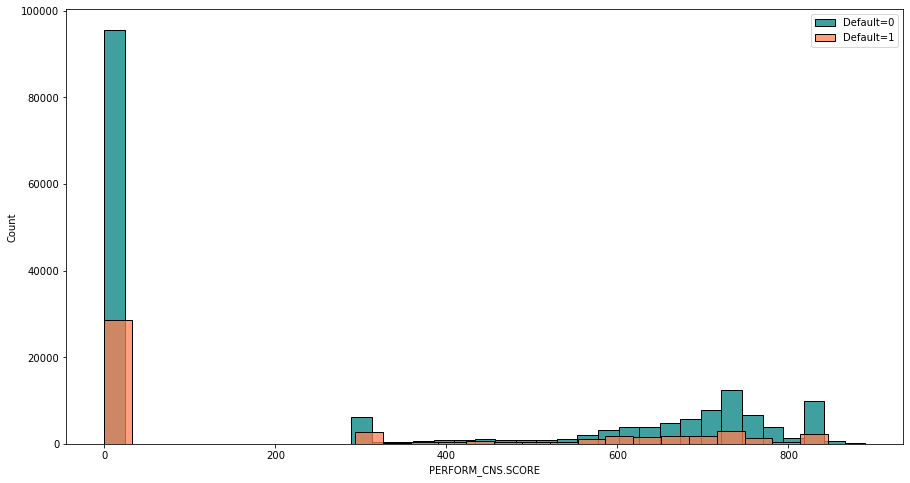

In [35]:
plt.figure(figsize=(15,8))
sns.histplot(df[df.loan_default==0]["PERFORM_CNS.SCORE"], label="Default=0", color="teal")
sns.histplot(df[df.loan_default==1]["PERFORM_CNS.SCORE"], label="Default=1", color="coral")
plt.legend()
plt.show()

In [36]:
# Primary and Secondary values

In [37]:
df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default', 'Calc_acct_age_months'],
      dtype='object')

In [38]:
df_cols = ['PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT']

In [39]:
len(df_cols)

14

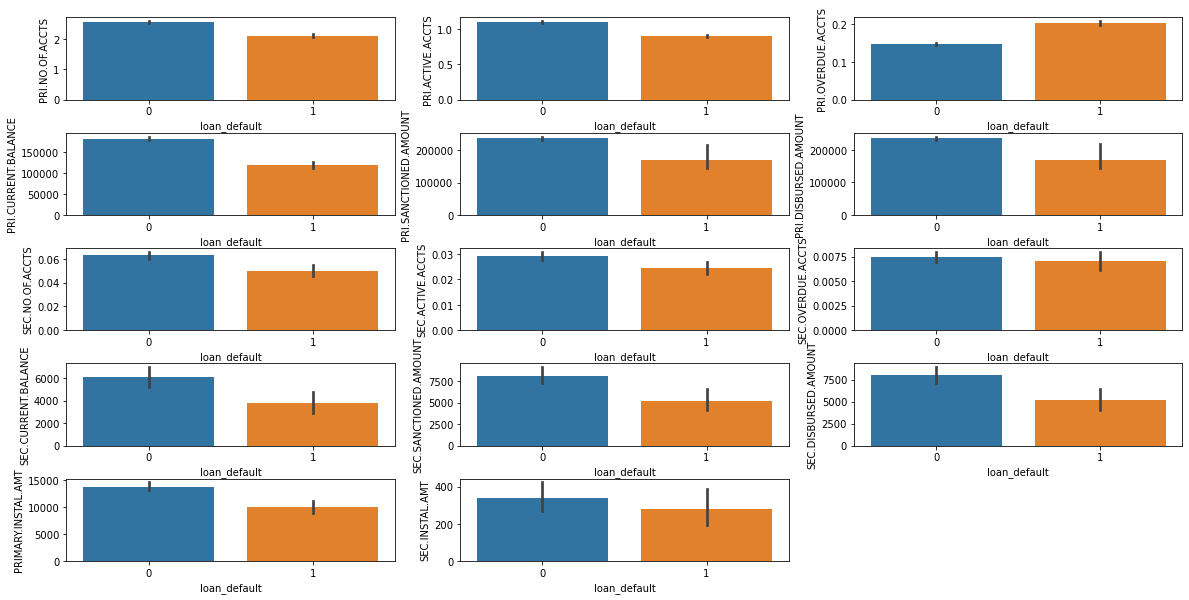

In [40]:
plt.figure(figsize=(20, 10))


for i in range(len(df_cols)):
    
    plt.subplot(5, 3, i+1)
    sns.barplot(data=df, x="loan_default" , y=df_cols[i])
    
    
plt.subplots_adjust(wspace=0.2, hspace=0.4)

In [41]:
# only occurance where more people have loan defaults are where the accounts have been overdue

In [42]:
df[['PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT']].value_counts()

PRI.SANCTIONED.AMOUNT  PRI.DISBURSED.AMOUNT  SEC.SANCTIONED.AMOUNT  SEC.DISBURSED.AMOUNT
0                      0                     0                      0                       131031
50000                  50000                 0                      0                         1323
30000                  30000                 0                      0                         1245
100000                 100000                0                      0                          890
40000                  40000                 0                      0                          744
                                                                                             ...  
100000                 13849                 0                      0                            1
                       14379                 0                      0                            1
                       23829                 0                      0                            1
                    

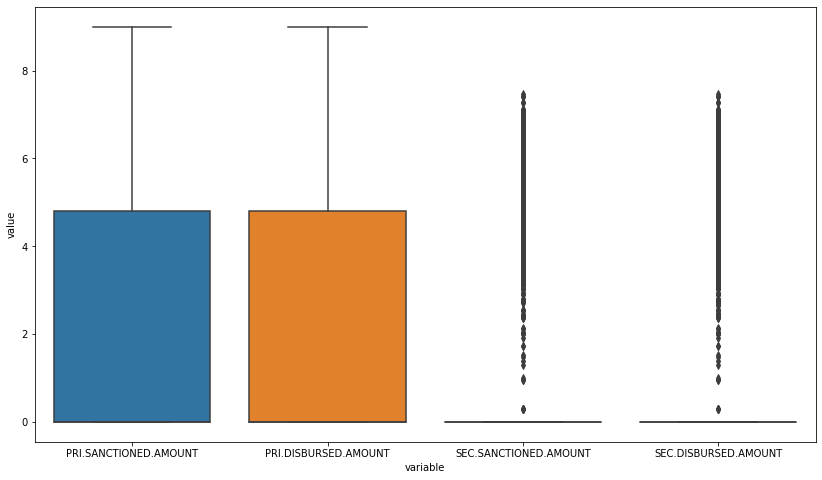

In [43]:
sanc_dis = df[['PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT']]
import numpy as np
sanc_dis

plt.figure(figsize=(14,8))
x = pd.melt(sanc_dis)
sns.boxplot(data=pd.melt(sanc_dis), x=('variable'), y=np.log10(x['value']+1))
plt.show()

#### Shows little difference between sanctioned and disbursed amounts for primary loans, however large differences in the amounts between primary and secondary loans. 

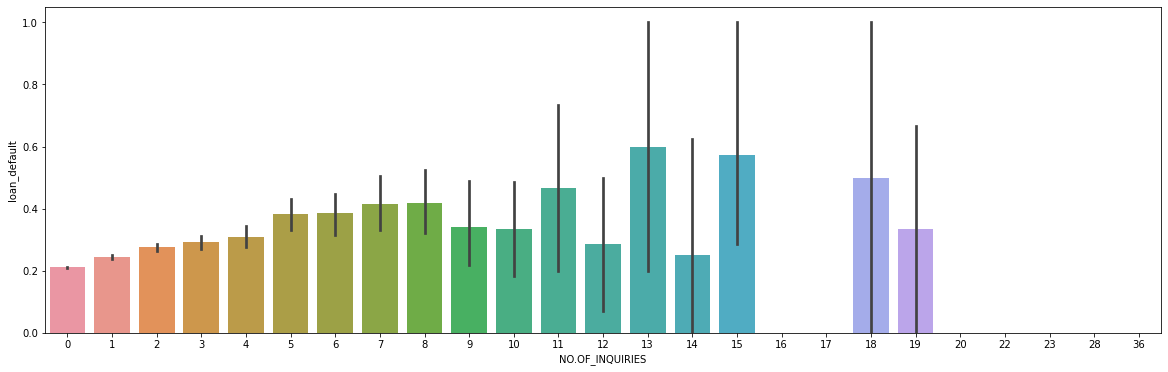

In [44]:
plt.figure(figsize=(20,6))
sns.barplot(data=df, x='NO.OF_INQUIRIES', y='loan_default')
plt.show()

In [45]:
## Looks like the number of loan defaults tend to increase with the number of inquiries

### Logistic Regression

In [46]:
# Logistic regression modelling for loan defaults

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [48]:
df

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Calc_acct_age_months
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,0
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,Salaried,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,561031,57759,76350,77.28,5,22289,51,3326,1981-11-10,Self employed,...,0,0,0,0,0,2yrs 4mon,2yrs 4mon,0,0,28
233150,649600,55009,71200,78.72,138,17408,51,3385,1992-10-15,Self employed,...,0,15209,0,0,0,1yrs 5mon,1yrs 5mon,1,0,17
233151,603445,58513,68000,88.24,135,23313,45,1797,1981-12-19,Self employed,...,0,257948,0,35,5,0yrs 9mon,3yrs 10mon,1,0,9
233152,442948,22824,40458,61.79,160,16212,48,96,1989-07-31,Self employed,...,0,26046,0,9,1,1yrs 2mon,3yrs 2mon,0,0,14


In [49]:
# convert object such as account age and credit history length integers in months.

In [50]:
df["AVERAGE.ACCT.AGE"] = ((((df["AVERAGE.ACCT.AGE"].str.extract("(\d+)yrs").astype(int))*12)) + ((df["AVERAGE.ACCT.AGE"].str.extract("(\d+)mon")).astype(int)))

In [51]:
df["CREDIT.HISTORY.LENGTH"] = ((((df["CREDIT.HISTORY.LENGTH"].str.extract("(\d+)yrs").astype(int))*12)) + ((df["CREDIT.HISTORY.LENGTH"].str.extract("(\d+)mon")).astype(int)))

In [52]:
df['Employment.Type'].unique()   # change to binary - 1 for salaried, 0 for self-employed

array(['Salaried', 'Self employed'], dtype=object)

In [53]:
df['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

In [54]:
conditions = [(df['Employment.Type'] == 'Salaried'), (df['Employment.Type'] == 'Self employed') ]

values = [1, 0]

df['Employment.Type'] = np.select(conditions, values)

In [55]:
df['Employment.Type'].value_counts()

0    127635
1     97858
Name: Employment.Type, dtype: int64

In [56]:
 # Drop columns which cannot be used for the logistic regression model. 
    
modeldf = df.drop(columns=['PERFORM_CNS.SCORE.DESCRIPTION', 'DisbursalDate', 'Date.of.Birth', 'Calc_acct_age_months' ])
modeldf

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1,6,...,0,0,0,0,0,0,0,0,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,0,6,...,0,0,0,0,0,0,0,0,0,0
2,539055,52378,60300,88.39,67,22807,45,1495,0,6,...,0,0,0,0,0,0,0,0,1,1
3,529269,46349,61500,76.42,67,22807,45,1502,1,6,...,0,0,0,0,0,0,0,0,0,0
4,563215,43594,78256,57.50,67,22744,86,1499,0,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,561031,57759,76350,77.28,5,22289,51,3326,0,9,...,0,0,0,0,0,0,28,28,0,0
233150,649600,55009,71200,78.72,138,17408,51,3385,0,9,...,0,0,15209,0,0,0,17,17,1,0
233151,603445,58513,68000,88.24,135,23313,45,1797,0,4,...,0,0,257948,0,35,5,9,46,1,0
233152,442948,22824,40458,61.79,160,16212,48,96,0,16,...,0,0,26046,0,9,1,14,38,0,0


In [57]:
# save data to xlsx to use in tableau dashboard 

df.to_excel('mod_data.xlsx', sheet_name='sheet1', index=False)

In [58]:
# define features and response variable sets

x = modeldf.iloc[:, 1:-1]
y = modeldf.loan_default

In [59]:
x

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,Employee_code_ID,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,50578,58400,89.55,67,22807,45,1441,1,6,1998,...,0,0,0,0,0,0,0,0,0,0
1,53278,61360,89.63,67,22807,45,1497,0,6,1998,...,0,0,0,0,0,0,0,0,0,0
2,52378,60300,88.39,67,22807,45,1495,0,6,1998,...,0,0,0,0,0,0,0,0,0,1
3,46349,61500,76.42,67,22807,45,1502,1,6,1998,...,0,0,0,0,0,0,0,0,0,0
4,43594,78256,57.50,67,22744,86,1499,0,6,1998,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,57759,76350,77.28,5,22289,51,3326,0,9,2229,...,0,0,0,0,0,0,0,28,28,0
233150,55009,71200,78.72,138,17408,51,3385,0,9,2690,...,0,0,0,15209,0,0,0,17,17,1
233151,58513,68000,88.24,135,23313,45,1797,0,4,90,...,0,0,0,257948,0,35,5,9,46,1
233152,22824,40458,61.79,160,16212,48,96,0,16,1299,...,0,0,0,26046,0,9,1,14,38,0


In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0)

In [61]:
# Need to scale the data as some columns are in vastly different scales 

stdsc = StandardScaler()
stdsc.fit(x_train)
x_train_std = stdsc.transform(x_train)
x_test_std = stdsc.transform(x_test)

In [62]:
model = LogisticRegression()

In [63]:
model.fit(x_train_std, y_train)

LogisticRegression()

In [64]:
# check score
print("Train score: ", model. score(x_train_std,y_train))

print("Test score: ", model. score(x_test_std,y_test))

Train score:  0.7827643934942404
Test score:  0.7807490188252512


In [65]:
y_train_pred = model.predict(x_train_std)
y_test_pred = model.predict(x_test_std)


In [66]:
y_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [67]:
pd.crosstab(y_train, y_train_pred)

col_0,0,1
loan_default,,
0,141016,280
1,38908,190


In [68]:
x_train.shape[0]  # shape of the series, how many rows (120) in the train data (out of 150)

180394

In [69]:
(141031+196)/x_train.shape[0]  # model score of train data set

0.7828808053482932

In [70]:
# Test precision and recall

from sklearn.metrics import precision_score, recall_score

In [71]:
precision_score(y_train,y_train_pred)

0.40425531914893614

In [72]:
recall_score(y_train, y_train_pred)

0.004859583610414855

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))



              precision    recall  f1-score   support

           0       0.78      1.00      0.88    141296
           1       0.40      0.00      0.01     39098

    accuracy                           0.78    180394
   macro avg       0.59      0.50      0.44    180394
weighted avg       0.70      0.78      0.69    180394

